import the relevant modules


In [1]:
#import modules for data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#module for datetime
from dateutil.relativedelta import relativedelta

#for data cleaning
import numpy.random as nr
import math

#for machine learning
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn import linear_model

In [2]:
#load the dataset
adventure_works=pd.read_csv(r"C:\Users\IFB19-039\Desktop\machine learning\AdvWorksCusts.csv")
ave_spend= pd.read_csv(r"C:\Users\IFB19-039\Desktop\machine learning\AW_AveMonthSpend.csv")

#combine teh two datasets
adventure_works['AveMonthSpend']=ave_spend['AveMonthSpend']

In [3]:
#view the first 5 columns
adventure_works.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [4]:
#print out the columns
adventure_works.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')

In [5]:
#some columns are not features so they are removed
adventure_works.drop(['Title','FirstName','Suffix',
                     'MiddleName','LastName',
                     'AddressLine1','AddressLine2',
                     'PostalCode','PhoneNumber'],axis=1,inplace=True)

In [6]:
adventure_works.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,Rockhampton,Queensland,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,Seaford,Victoria,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,Hobart,Tasmania,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,North Ryde,New South Wales,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,Wollongong,New South Wales,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [7]:
# Calculate age of customer based on birthdate
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'), pd.to_datetime(end)) 
    return '{}'.format(r.years)


adventure_works['Age'] = adventure_works['BirthDate'].apply(calculate_age)

# Convert age to integer
adventure_works['Age'] = adventure_works['Age'].astype('int64')

In [8]:
#print the shape
adventure_works.shape

(16519, 16)

In [9]:
#print out the summary stats table
adventure_works.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532,72.405957,59.448393
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718,27.285370,11.248021
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,40.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000,52.000000,51.000000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000,68.000000,58.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000,84.000000,67.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,111.000000


In [10]:
adventure_works.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,11000,Rockhampton,Queensland,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,55
1,11001,Seaford,Victoria,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,56
2,11002,Hobart,Tasmania,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,56
3,11003,North Ryde,New South Wales,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,53
4,11004,Wollongong,New South Wales,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,53


In [11]:
#print out a frequency table for the categorical columns

def count_unique(adventure_works,cols):
    for col in cols:
        print('\n'+'For column'+col)
        print(adventure_works[col].value_counts())
        
#define categorical columns
cat_cols=['City','StateProvinceName','CountryRegionName',
         'Education','Occupation','Gender','MaritalStatus']

#call the function
count_unique(adventure_works,cat_cols)
        


For columnCity
London           379
Paris            344
Beaverton        190
Burien           189
Chula Vista      187
                ... 
Bountiful          1
Newport Hills      1
Baytown            1
Casper             1
Cedar Park         1
Name: City, Length: 270, dtype: int64

For columnStateProvinceName
California             3973
Washington             2038
England                1715
British Columbia       1401
New South Wales        1391
Oregon                  938
Victoria                805
Queensland              717
Saarland                391
Nordrhein-Westfalen     365
Seine (Paris)           344
Hessen                  334
Hamburg                 271
Seine Saint Denis       257
Nord                    248
South Australia         212
Bayern                  200
Hauts de Seine          169
Yveline                 149
Essonne                 133
Tasmania                 92
Seine et Marne           52
Loiret                   52
Moselle                  49
Brandenburg   

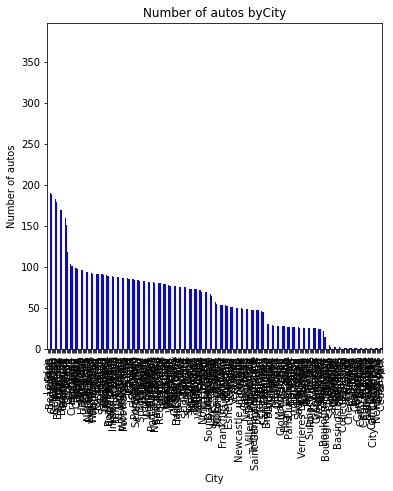

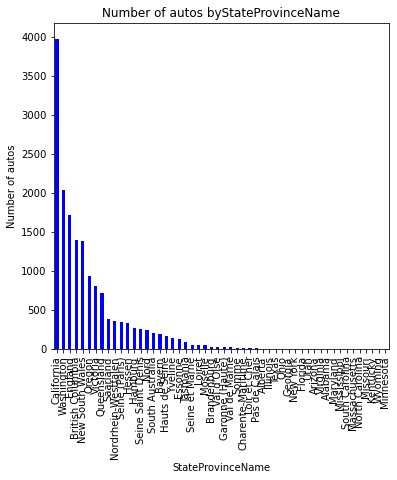

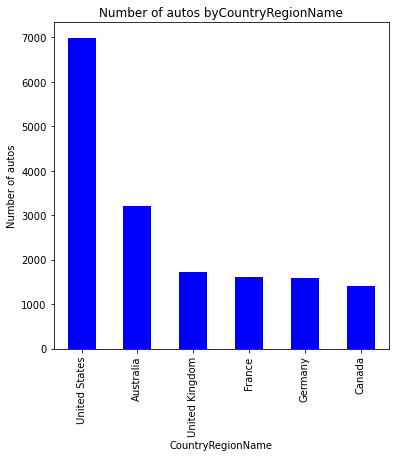

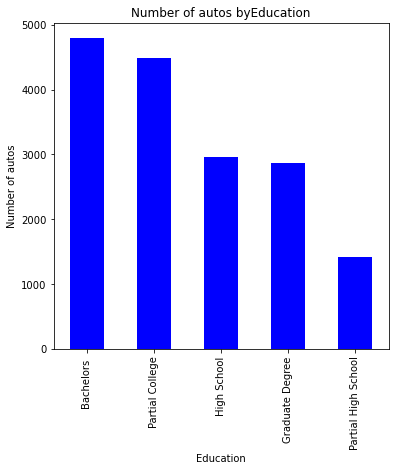

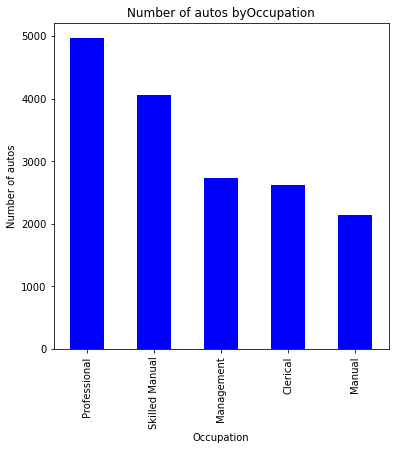

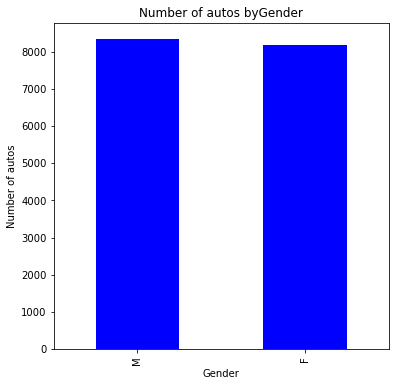

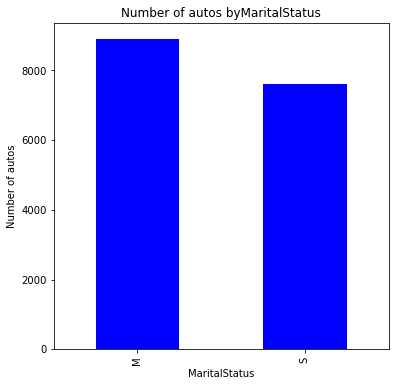

In [12]:
#visualize distributions
def plot_bars(adventure_works, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = adventure_works[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

#plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bars(adventure_works, cat_cols)   

In [13]:
#city and state province name are too noisy
#will therefore be removed
adventure_works.drop(['City','StateProvinceName'],
                    axis=1,inplace=True)

In [14]:
adventure_works.head()

,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,11000,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,55
1,11001,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,56
2,11002,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,56
3,11003,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,53
4,11004,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,53


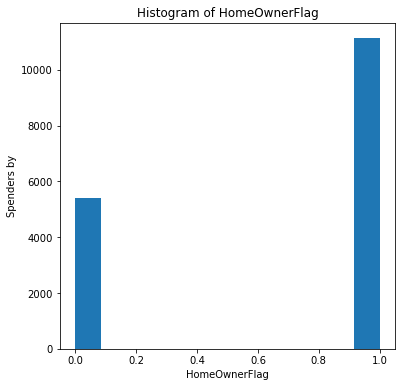

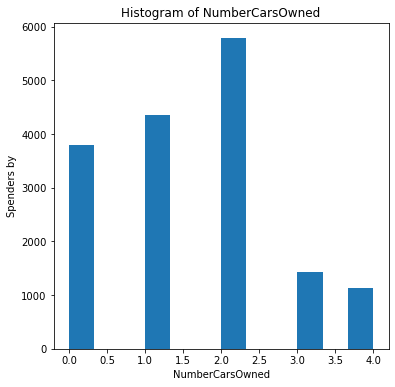

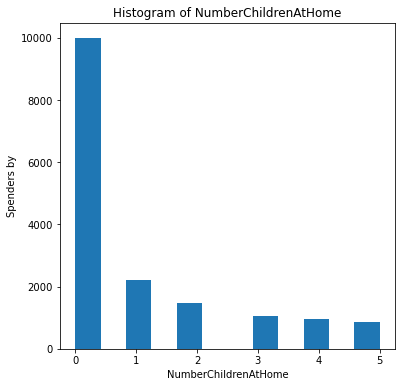

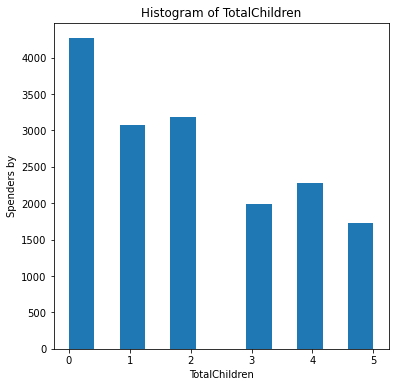

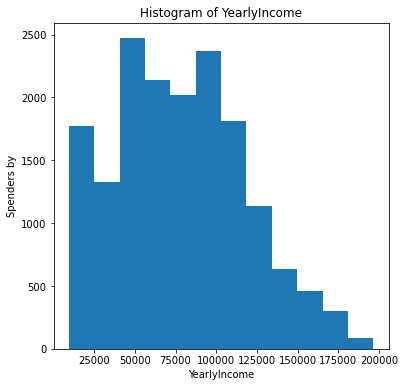

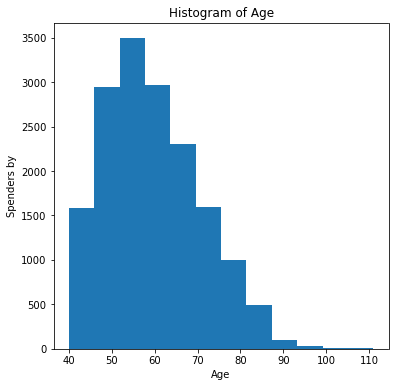

In [15]:
#plot a histogram to show the distributions
def plot_histogram(adventure_works, cols, bins = 12):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        adventure_works[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Spenders by')# Set text for y axis
        plt.show()
        
num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
            'TotalChildren','YearlyIncome','Age']    
plot_histogram(adventure_works, num_cols)

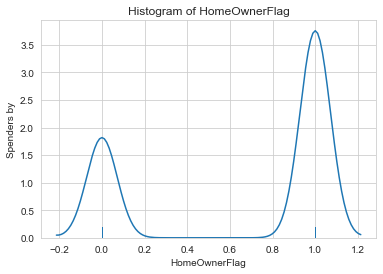

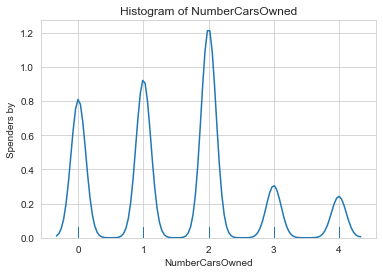

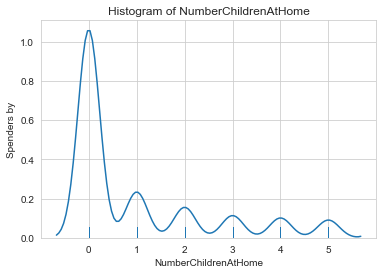

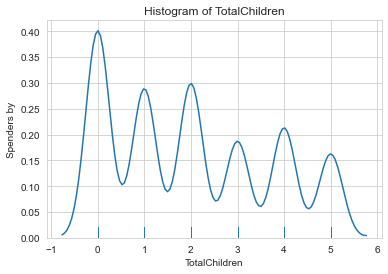

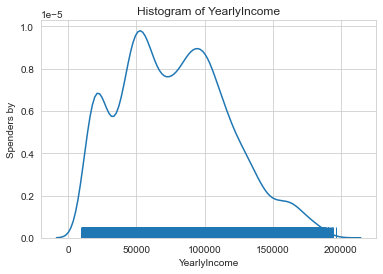

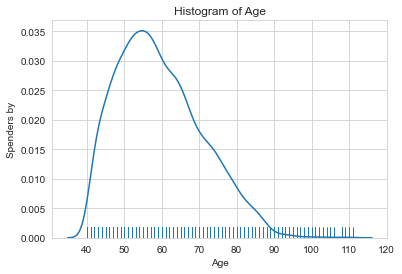

In [16]:
#kernel density plots
def plot_density_hist(adventure_works, cols, bins = 12, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(adventure_works[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Spenders by')# Set text for y axis
        plt.show()
        
plot_density_hist(adventure_works, num_cols)  

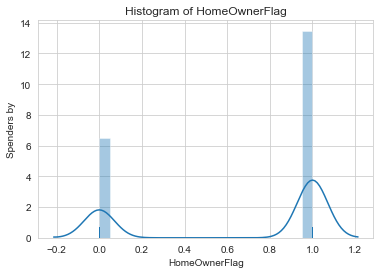

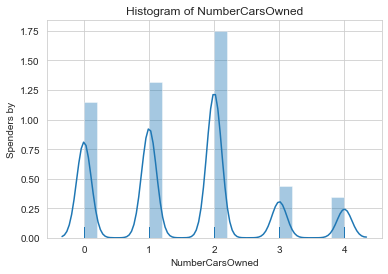

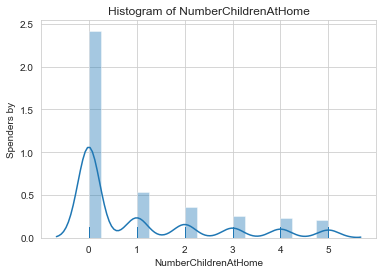

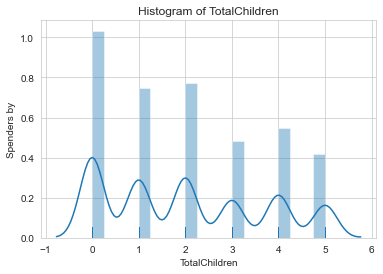

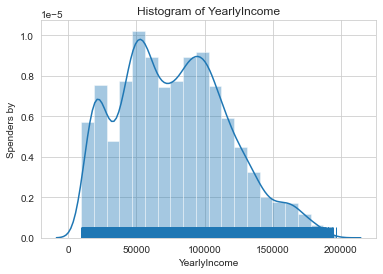

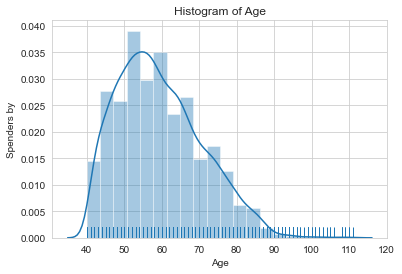

In [17]:
#combine histograms and kernel density plots
plot_density_hist(adventure_works, num_cols, bins = 20, hist = True)

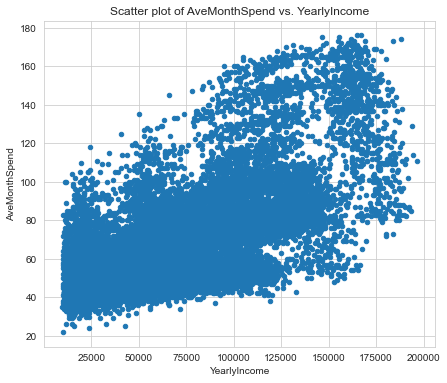

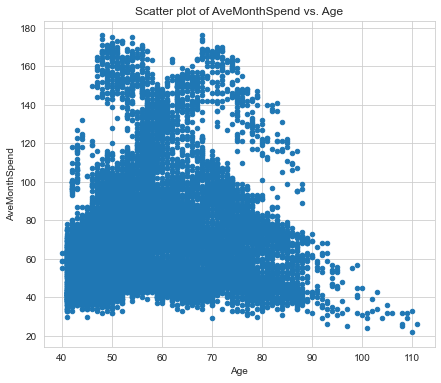

In [18]:
#two dimensional plots
def plot_scatter(adventure_works, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        adventure_works.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome','Age'
            ]
plot_scatter(adventure_works, num_cols)   

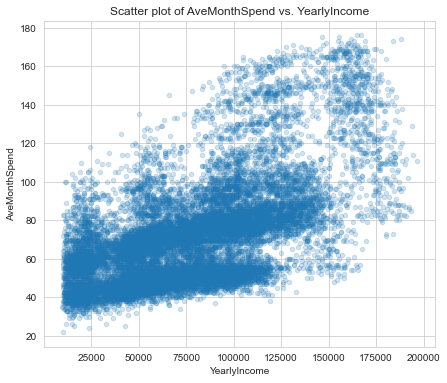

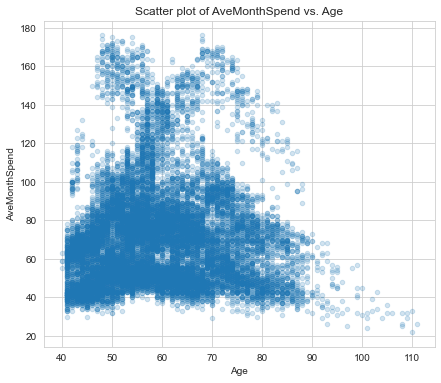

In [19]:
#add transparency argument in our dataset
def plot_scatter_t(adventure_works, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        adventure_works.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(adventure_works, num_cols, alpha = 0.2)    

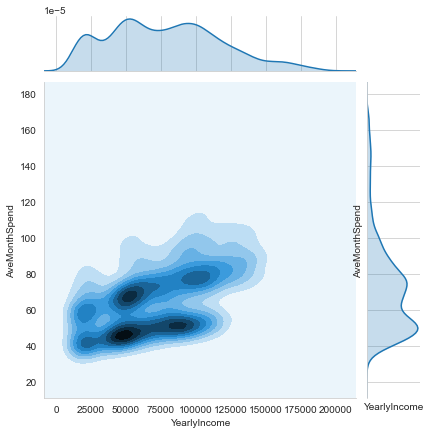

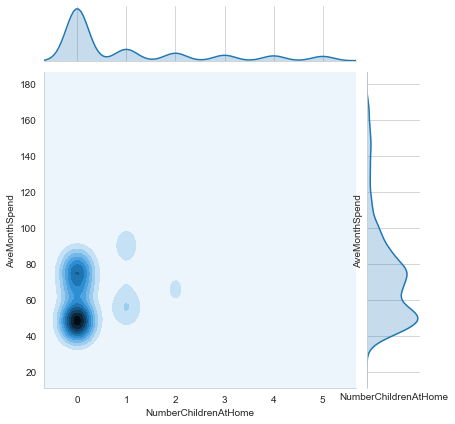

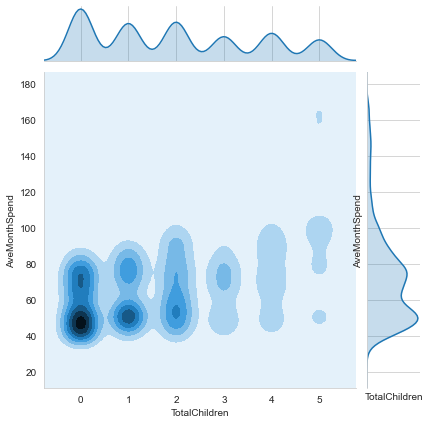

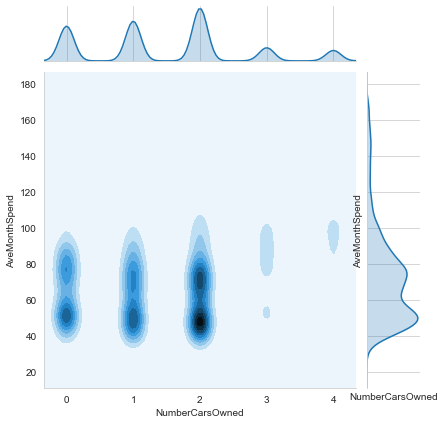

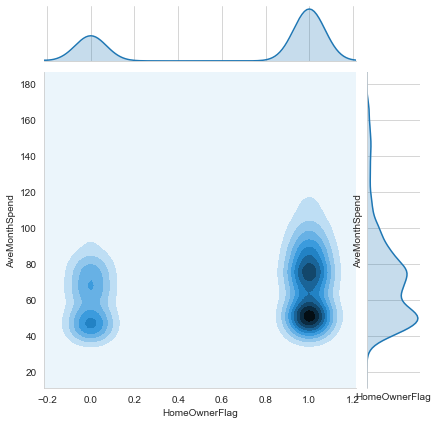

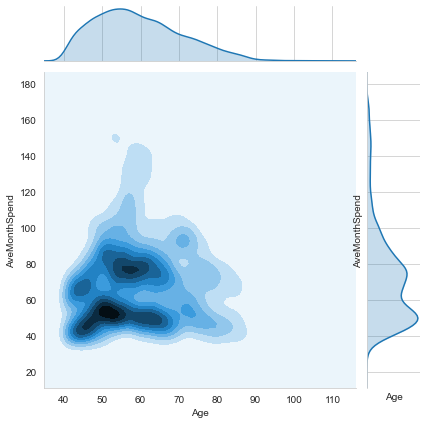

In [20]:
def plot_desity_2d(adventure_works, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=adventure_works, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome','NumberChildrenAtHome',
           'TotalChildren','NumberCarsOwned','HomeOwnerFlag','Age']
plot_desity_2d(adventure_works, num_cols)      

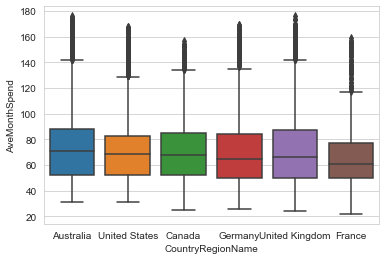

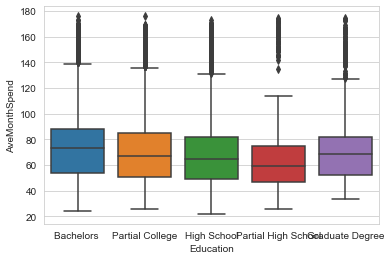

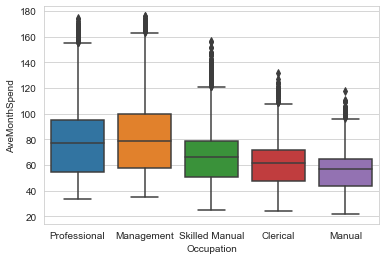

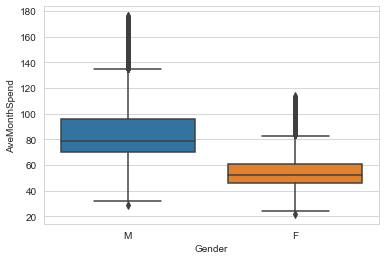

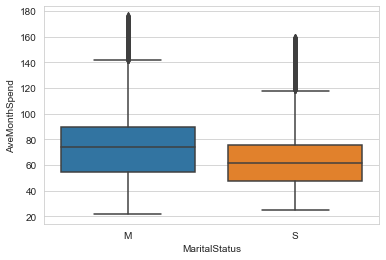

In [21]:
#relationship between categorical and numeric features
def plot_box(adventure_works, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=adventure_works)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 
            'Gender', 'MaritalStatus']
plot_box(adventure_works, cat_cols)  

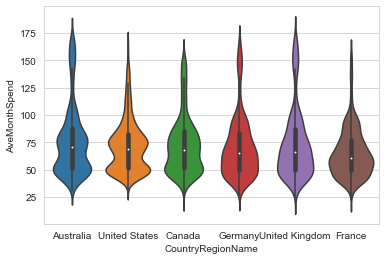

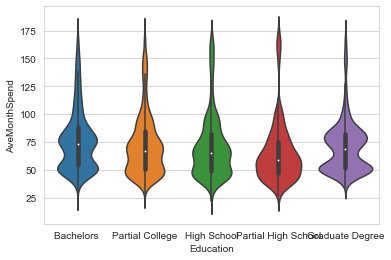

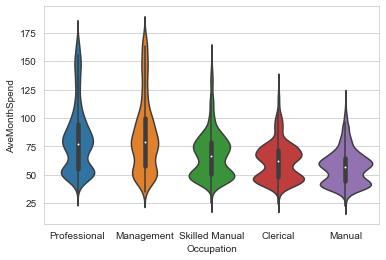

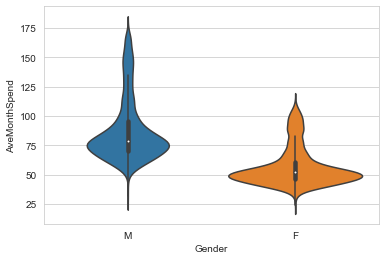

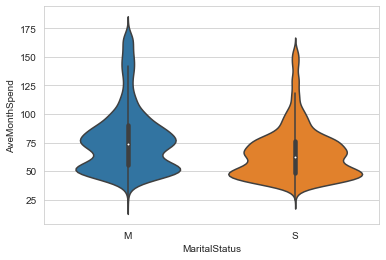

In [22]:
#plot violin plots
def plot_violin(adventure_works, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=adventure_works)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(adventure_works, cat_cols)    

#DATA PREPARATION AND CLEANING

In [23]:
#check for missing values
adventure_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16519 non-null  int64 
 1   CountryRegionName     16519 non-null  object
 2   BirthDate             16519 non-null  object
 3   Education             16519 non-null  object
 4   Occupation            16519 non-null  object
 5   Gender                16519 non-null  object
 6   MaritalStatus         16519 non-null  object
 7   HomeOwnerFlag         16519 non-null  int64 
 8   NumberCarsOwned       16519 non-null  int64 
 9   NumberChildrenAtHome  16519 non-null  int64 
 10  TotalChildren         16519 non-null  int64 
 11  YearlyIncome          16519 non-null  int64 
 12  AveMonthSpend         16519 non-null  int64 
 13  Age                   16519 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.8+ MB


In [24]:
#count duplicates
# Df contains 115 duplicates
cont_duplicates = adventure_works.shape[0]
unique_df = adventure_works.CustomerID.unique().shape[0]
print("Total:", cont_duplicates,
      "Unique:", unique_df)
print(cont_duplicates-unique_df)


Total: 16519 Unique: 16404
115


In [25]:
#delete duplicates 
# Remove duplicates and keep the lastest one
print(cont_duplicates)
adventure_works.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(adventure_works.shape[0])

16519
16404


In [26]:
#treating numerical values
adventure_works.head()

,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,11000,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,55
1,11001,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,56
2,11002,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,56
3,11003,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,53
4,11004,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,53


In [27]:
adventure_works.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,59.436967
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,11.243341
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,40.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,51.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,58.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,67.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,111.000000


In [28]:
#rescale numeric features
adventure_works['log_YearlyIncome'] = np.log(adventure_works['YearlyIncome'])
adventure_works['log_Age']=np.log(adventure_works['Age'])
adventure_works['log_AveMonthSpend']=np.log(adventure_works['AveMonthSpend'])

In [29]:
adventure_works.head(10)

,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age,log_YearlyIncome,log_Age,log_AveMonthSpend
0,11000,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,55,11.834625,4.007333,4.488636
1,11001,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,56,11.524271,4.025352,4.762174
2,11002,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,56,11.428946,4.025352,4.812184
3,11003,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,53,11.370071,3.970292,3.912023
4,11004,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,53,11.437889,3.970292,4.553877
5,11005,Australia,05/08/1965,Bachelors,Professional,M,S,1,1,0,0,103199,78,56,11.544414,4.025352,4.356709
6,11006,Australia,06/12/1965,Bachelors,Professional,F,S,1,1,0,0,84756,54,56,11.347532,4.025352,3.988984
7,11007,Australia,09/05/1964,Bachelors,Professional,M,M,1,2,3,3,109759,130,57,11.606042,4.043051,4.867534
8,11008,Australia,07/07/1964,Bachelors,Professional,F,S,1,3,4,4,88005,85,57,11.385149,4.043051,4.442651
9,11009,Australia,01/04/1964,Bachelors,Professional,M,S,0,1,0,0,106399,74,57,11.574951,4.043051,4.304065


In [30]:
adventure_works.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age,log_YearlyIncome,log_Age,log_AveMonthSpend
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,59.436967,11.102220,4.067528,4.220018
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,11.243341,0.624990,0.185634,0.344490
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,40.000000,9.157151,3.688879,3.091042
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,51.000000,10.774964,3.931826,3.951244
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,58.000000,11.240132,4.060443,4.219508
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,67.000000,11.563730,4.204693,4.430817
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,111.000000,12.188474,4.709530,5.170484


In [31]:
adventure_works.head()

,CustomerID,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age,log_YearlyIncome,log_Age,log_AveMonthSpend
0,11000,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,55,11.834625,4.007333,4.488636
1,11001,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,56,11.524271,4.025352,4.762174
2,11002,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,56,11.428946,4.025352,4.812184
3,11003,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,53,11.370071,3.970292,3.912023
4,11004,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,53,11.437889,3.970292,4.553877


In [32]:
#apply hot encoding to the categorical variables
# Encode categorical data
def encode_string(cat_features):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Occupation',
                       'Gender','MaritalStatus','HomeOwnerFlag']

Features = encode_string(adventure_works['CountryRegionName'])

for col in categorical_columns:
    temp = encode_string(adventure_works[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)

(16404, 22)


In [33]:
#concatenate numeric features
Features = np.concatenate([Features, np.array(adventure_works[['log_YearlyIncome', 'log_Age',
                                                              'NumberCarsOwned','TotalChildren',
                                                              'NumberChildrenAtHome']])], axis = 1)
Features[:2,:]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        , 11.83462483,  4.00733319,  0.        ,
         2.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        , 11.52427086,  4.02535169,  1.        ,
         3.        ,  3.        ]])

In [34]:
#split the dataset
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(adventure_works['log_AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [35]:
#rescale the numeric features
scaler = preprocessing.StandardScaler().fit(x_train[:,22:])
x_train[:,22:] = scaler.transform(x_train[:,22:])
x_test[:,22:] = scaler.transform(x_test[:,22:])
print(x_train.shape)
x_train[:22,:]


(16364, 27)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00, -1.12482139e+00, -1.52638319e+00,
         4.39191512e-01, -1.19137336e+00, -6.54577612e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  8.27385052e-01, -7.31096884e-

In [36]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [37]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.09707339e+10  6.09707339e+10  6.09707339e+10  6.09707339e+10
  6.09707339e+10  6.09707339e+10  1.41511010e+11  1.41511010e+11
  1.41511010e+11  1.41511010e+11  1.41511010e+11 -1.33805824e+11
 -1.33805824e+11 -1.33805824e+11 -1.33805824e+11 -1.33805824e+11
 -2.89348874e+11 -2.89348874e+11 -4.07211025e+10 -4.07211025e+10
  2.61394057e+11  2.61394057e+11  1.08052575e-01 -1.58184336e-02
 -8.32784617e-03  1.82895679e-03  2.04605409e-01]


In [38]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 0.0032664823360871896
Root Mean Square Error = 0.05715314808553584
Mean Absolute Error    = 0.04518887695837688
Median Absolute Error  = 0.043498733694337544
R^2                    = 0.9761322011533071
Adjusted R^2           = 0.9224296537482481


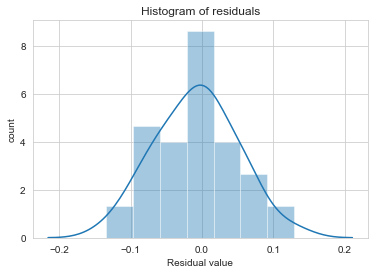

In [39]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

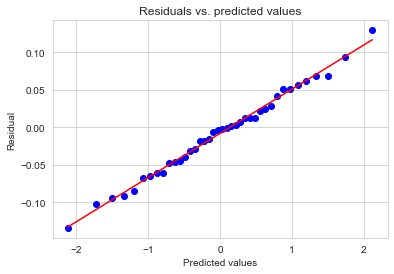

In [40]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

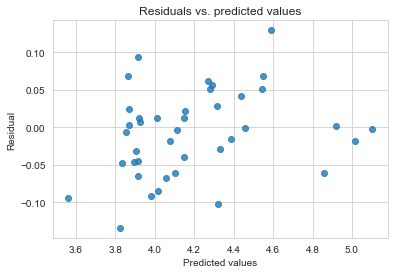

In [41]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

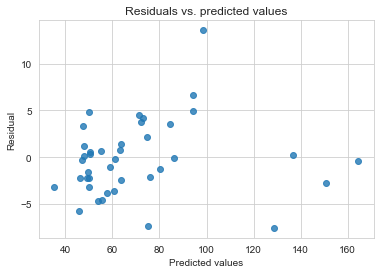

In [42]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 